# This notebook tests the outputs of VESIcal for the Liu et al. (2005) model.
- This notebook relies on the Excel spreadsheet entitled: "Testing_Liu_et_al_2005.xlsx"
- Test 1 compares the experimental pressures in the H$_2$O-only experiments in Tables 2a and 2b from the main text to the saturation pressures obtained from VESIcal for the "LiuWater" model. 
- Test 2 uses a synthetic array of inputs with increasing H$_2$O contents to compare calculated saturation pressures using "LiuWater" to those shown in their Fig. 5 for three different temperatures. 
- Test 3 uses a synthetic array of inputs with increasing CO$_2$ contents using "LiuCarbon" to recreate their Fig. 7. Liu et al. (2005) calibrate their CO$_2$ model based on published data, which they correct using molar absorptivities. Due to uncertainty about the exact carbon contents used for their calibration dataset following this correction, we do not test this model against the calibration dataset.
- Test 4 produces isobars to recreate their Fig. 6. 

In [1]:
import sys
sys.path.append(r'../..')
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

# Test 1 - Comparing experimental pressures to those calculated from VESIcal

In [3]:
myfile= v.BatchFile('Testing_Liu_et_al_2005.xlsx', sheet_name='Test 1')
data = myfile.data
satPs_wtemps_Liu_Water=myfile.calculate_saturation_pressure(temperature="Temp", model='Liu')

myfile.get_data()

SiO2  TiO2  Al2O3   FeO   MgO   CaO  \
Sample1                               77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1               77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1-duplicate-1   77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1-duplicate-2   77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1-duplicate-3   77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1-duplicate-4   77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1-duplicate-5   77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1-duplicate-6   77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 1-duplicate-7   77.19  0.06  12.80  0.94  0.03  0.53   
Liu et al. 2005 Table 2               75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 2-duplicate-1   75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 2-duplicate-2   75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 2-duplicate-3   75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 2-duplicate-4   75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 2-duplicate-5   75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 2-duplicate-6   75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 2-duplicate-7   75.03  0.20  13.42  1.46  0.13  0.62   
Liu et al. 2005 Table 5               76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 5-duplicate-1   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 5-duplicate-2   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 5-duplicate-3   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 5-duplicate-4   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 4               77.24  0.07  12.67  0.55  0.05  0.51   
Liu et al. 2005 Table 3               76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 5-duplicate-5   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 4-duplicate-1   77.24  0.07  12.67  0.55  0.05  0.51   
Liu et al. 2005 Table 5-duplicate-6   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 3-duplicate-1   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 4-duplicate-2   77.24  0.07  12.67  0.55  0.05  0.51   
Liu et al. 2005 Table 5-duplicate-7   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 3-duplicate-2   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 5-duplicate-8   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 4-duplicate-3   77.24  0.07  12.67  0.55  0.05  0.51   
Liu et al. 2005 Table 3-duplicate-3   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 3-duplicate-4   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 5-duplicate-9   76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 3-duplicate-5   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 3-duplicate-6   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 5-duplicate-10  76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 4-duplicate-4   77.24  0.07  12.67  0.55  0.05  0.51   
Liu et al. 2005 Table 3-duplicate-7   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 3-duplicate-8   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 5-duplicate-11  76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 4-duplicate-5   77.24  0.07  12.67  0.55  0.05  0.51   
Liu et al. 2005 Table 5-duplicate-12  76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 3-duplicate-9   76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 3-duplicate-10  76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 5-duplicate-13  76.62  0.03  13.53  0.02  0.01  0.01   
Liu et al. 2005 Table 4-duplicate-6   77.24  0.07  12.67  0.55  0.05  0.51   
Liu et al. 2005 Table 3-duplicate-11  76.47  0.07  12.44  1.02  0.03  0.53   
Liu et al. 2005 Table 5-duplicate-14  76.62  0.03  13.53  0.0

In [7]:
testsample = myfile.get_sample_composition('Sample1', asSampleClass=True)
testsample.set_default_units("mol_oxides")
disH2O = v.calculate_dissolved_volatiles(sample=testsample, temperature=552, pressure=0.98, X_fluid=1, model="MagmaSat").result
Ptest = v.calculate_saturation_pressure(sample=testsample, temperature=552, model="MagmaSat").result
disH2O

TypeError: 'NoneType' object is not iterable

In [ ]:
satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal']

In [ ]:
satPs_wtemps_Liu_Water['Warnings']

In [ ]:
testsample.get_composition('H2O')

## Calculating Linear regressions and plotting data

In [ ]:
X_Test1=satPs_wtemps_Liu_Water['Press'] # Convert MPa from their supplement to bars
Y_Test1=satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1) #& (XComb<7000) # This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparing P$_{Sat}$ from VESIcal to experimental pressures',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
plt.scatter(satPs_wtemps_Liu_Water['Press'], satPs_wtemps_Liu_Water['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 5)) 
one='1:1'
#plt.plot([0, 6000], [0, 6000])
plt.text(50, 150, I)
plt.text(50, 180, G)
plt.text(50, 200, R)
plt.text(252, 250, one)
plt.xlim([-10, 270])

# Test 2 -Recreating their Fig. 5 using a synthetic array of inputs
- This code was run for 3 temperatures (700, 800 and 1200°C), and overlain on Fig. 5 of Liu et al. (2005) in adobe illustrator (pasted below). 

In [ ]:
# Example for how curves were generated to overlay on Fig. 5
myfile_syn= v.BatchFile('Testing_Liu_et_al_2005.xlsx',   input_type='wtpercent', sheet_name='Test 2')
data_syn = myfile_syn.data
satPs_wtemps_Liu_Water_syn=myfile_syn.calculate_saturation_pressure(temperature=1200, model='LiuWater')

fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
plt.scatter(0.1*satPs_wtemps_Liu_Water_syn['SaturationP_bars_VESIcal'], satPs_wtemps_Liu_Water_syn['H2O'])
plt.xlim([0, 500])
plt.ylim([0, 20])
plt.xlabel('H$_2$O content')
plt.ylabel('P$_{Sat}$ (VESIcal, MPa)')
plt.yticks()
fig.savefig('1200Ccurves.svg', transparent=True)

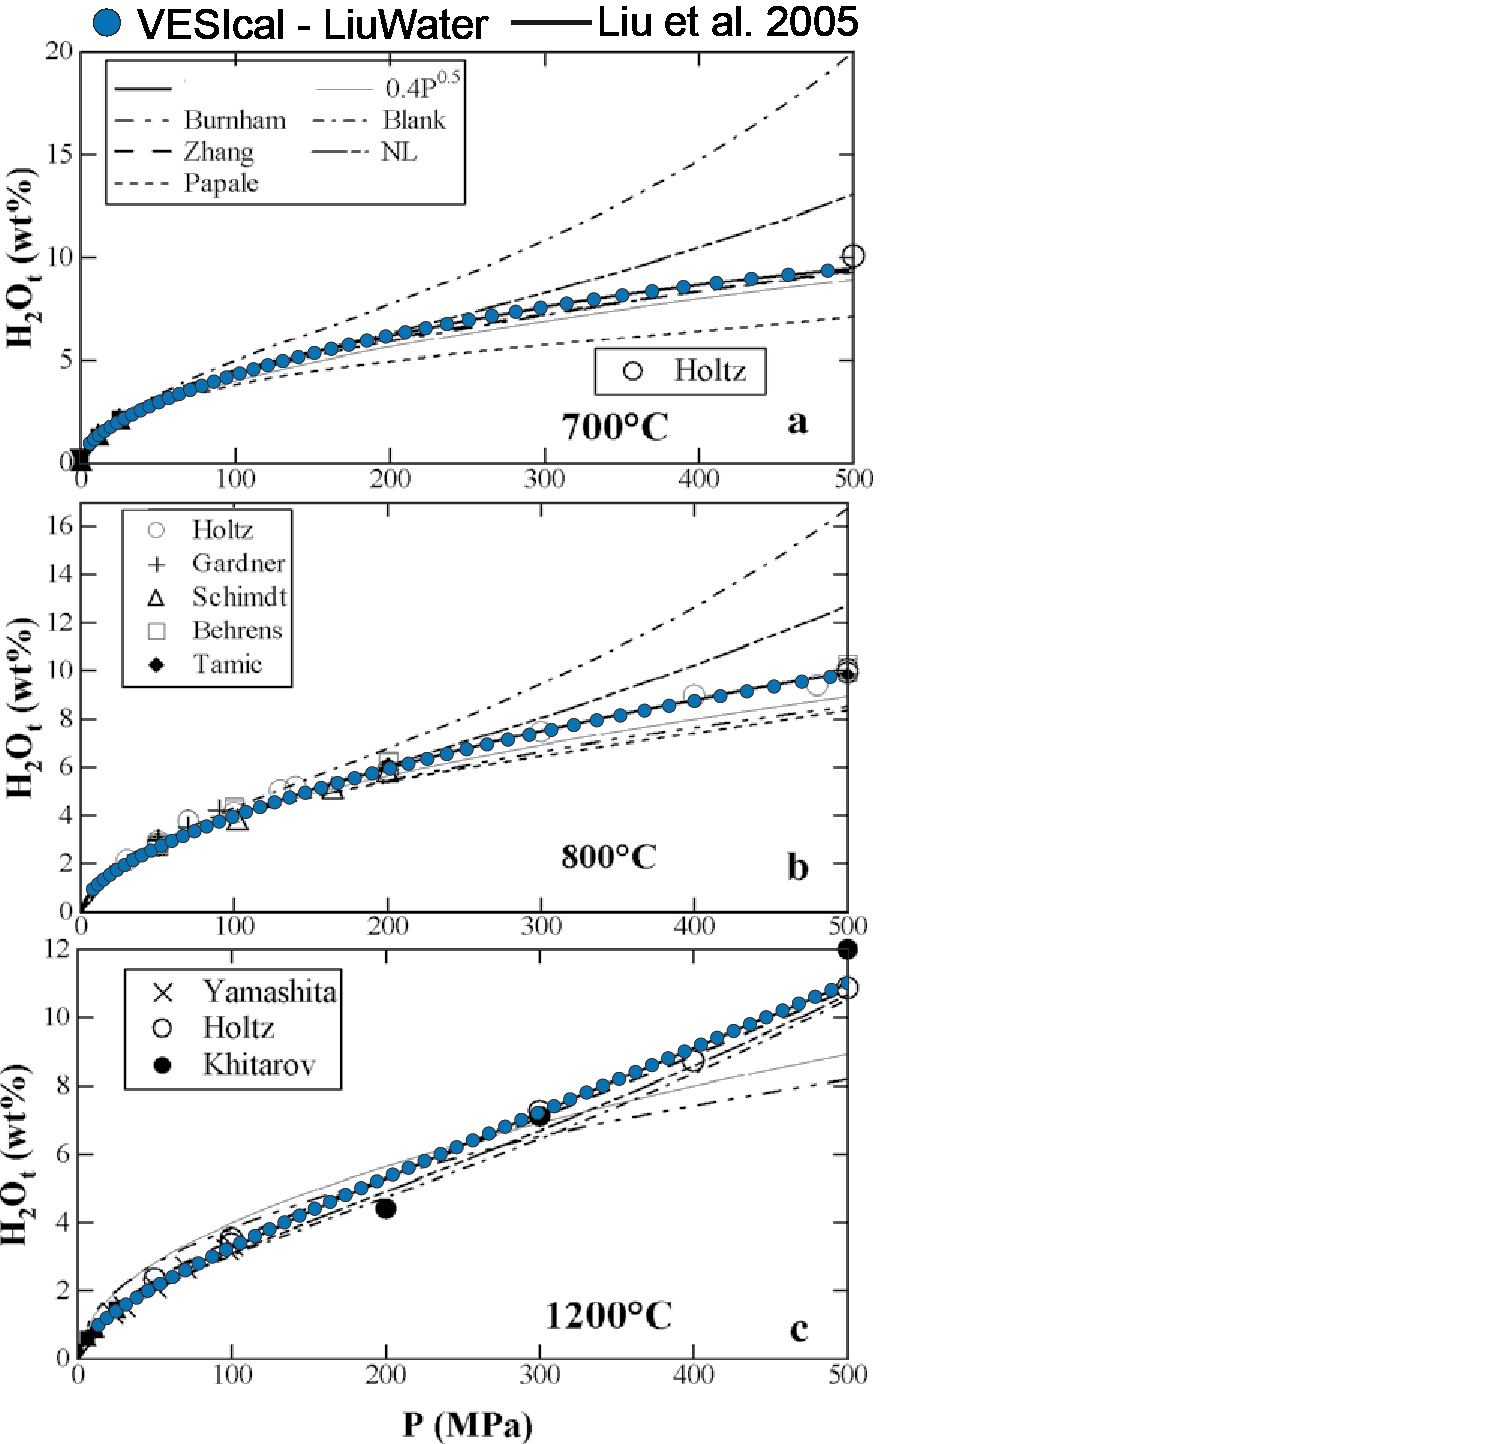


# Test 3 - Recreating their Fig. 7  
- The black line on Fig. 7 represents the output of their Equation 2b for 1050°C. We generate a synthetic anhydrous dataset with varying CO$_2$ contents, and calculate saturation pressures using the Liu et al. (2005) H$_2$O model. These fall perfectly along this line. 

In [ ]:
myfile_CO2= v.BatchFile('Testing_Liu_et_al_2005.xlsx',   input_type='wtpercent', sheet_name='Test 3')
data_CO2 = myfile_CO2.data
data_CO2.head()

In [ ]:
myfile_CO2= v.BatchFile('Testing_Liu_et_al_2005.xlsx',   input_type='wtpercent', sheet_name='Test 3')
satPs_wtemps_Liu_CO2=myfile_CO2.calculate_saturation_pressure(temperature=1050, model='LiuCarbon')

fig, ax1 = plt.subplots(figsize = (5,4)) # adjust dimensions of figure here
plt.scatter(0.1*satPs_wtemps_Liu_CO2['SaturationP_bars_VESIcal'], 10000*satPs_wtemps_Liu_CO2['CO2'], edgecolor='k')
plt.ylim([0, 3000])
plt.xlim([0, 700])
plt.ylabel('CO$_2$ content (ppm)')
plt.xlabel('P$_{Sat}$ (VESIcal, MPa)')
plt.yticks()
fig.savefig('1050CO2curves.svg', transparent=True)

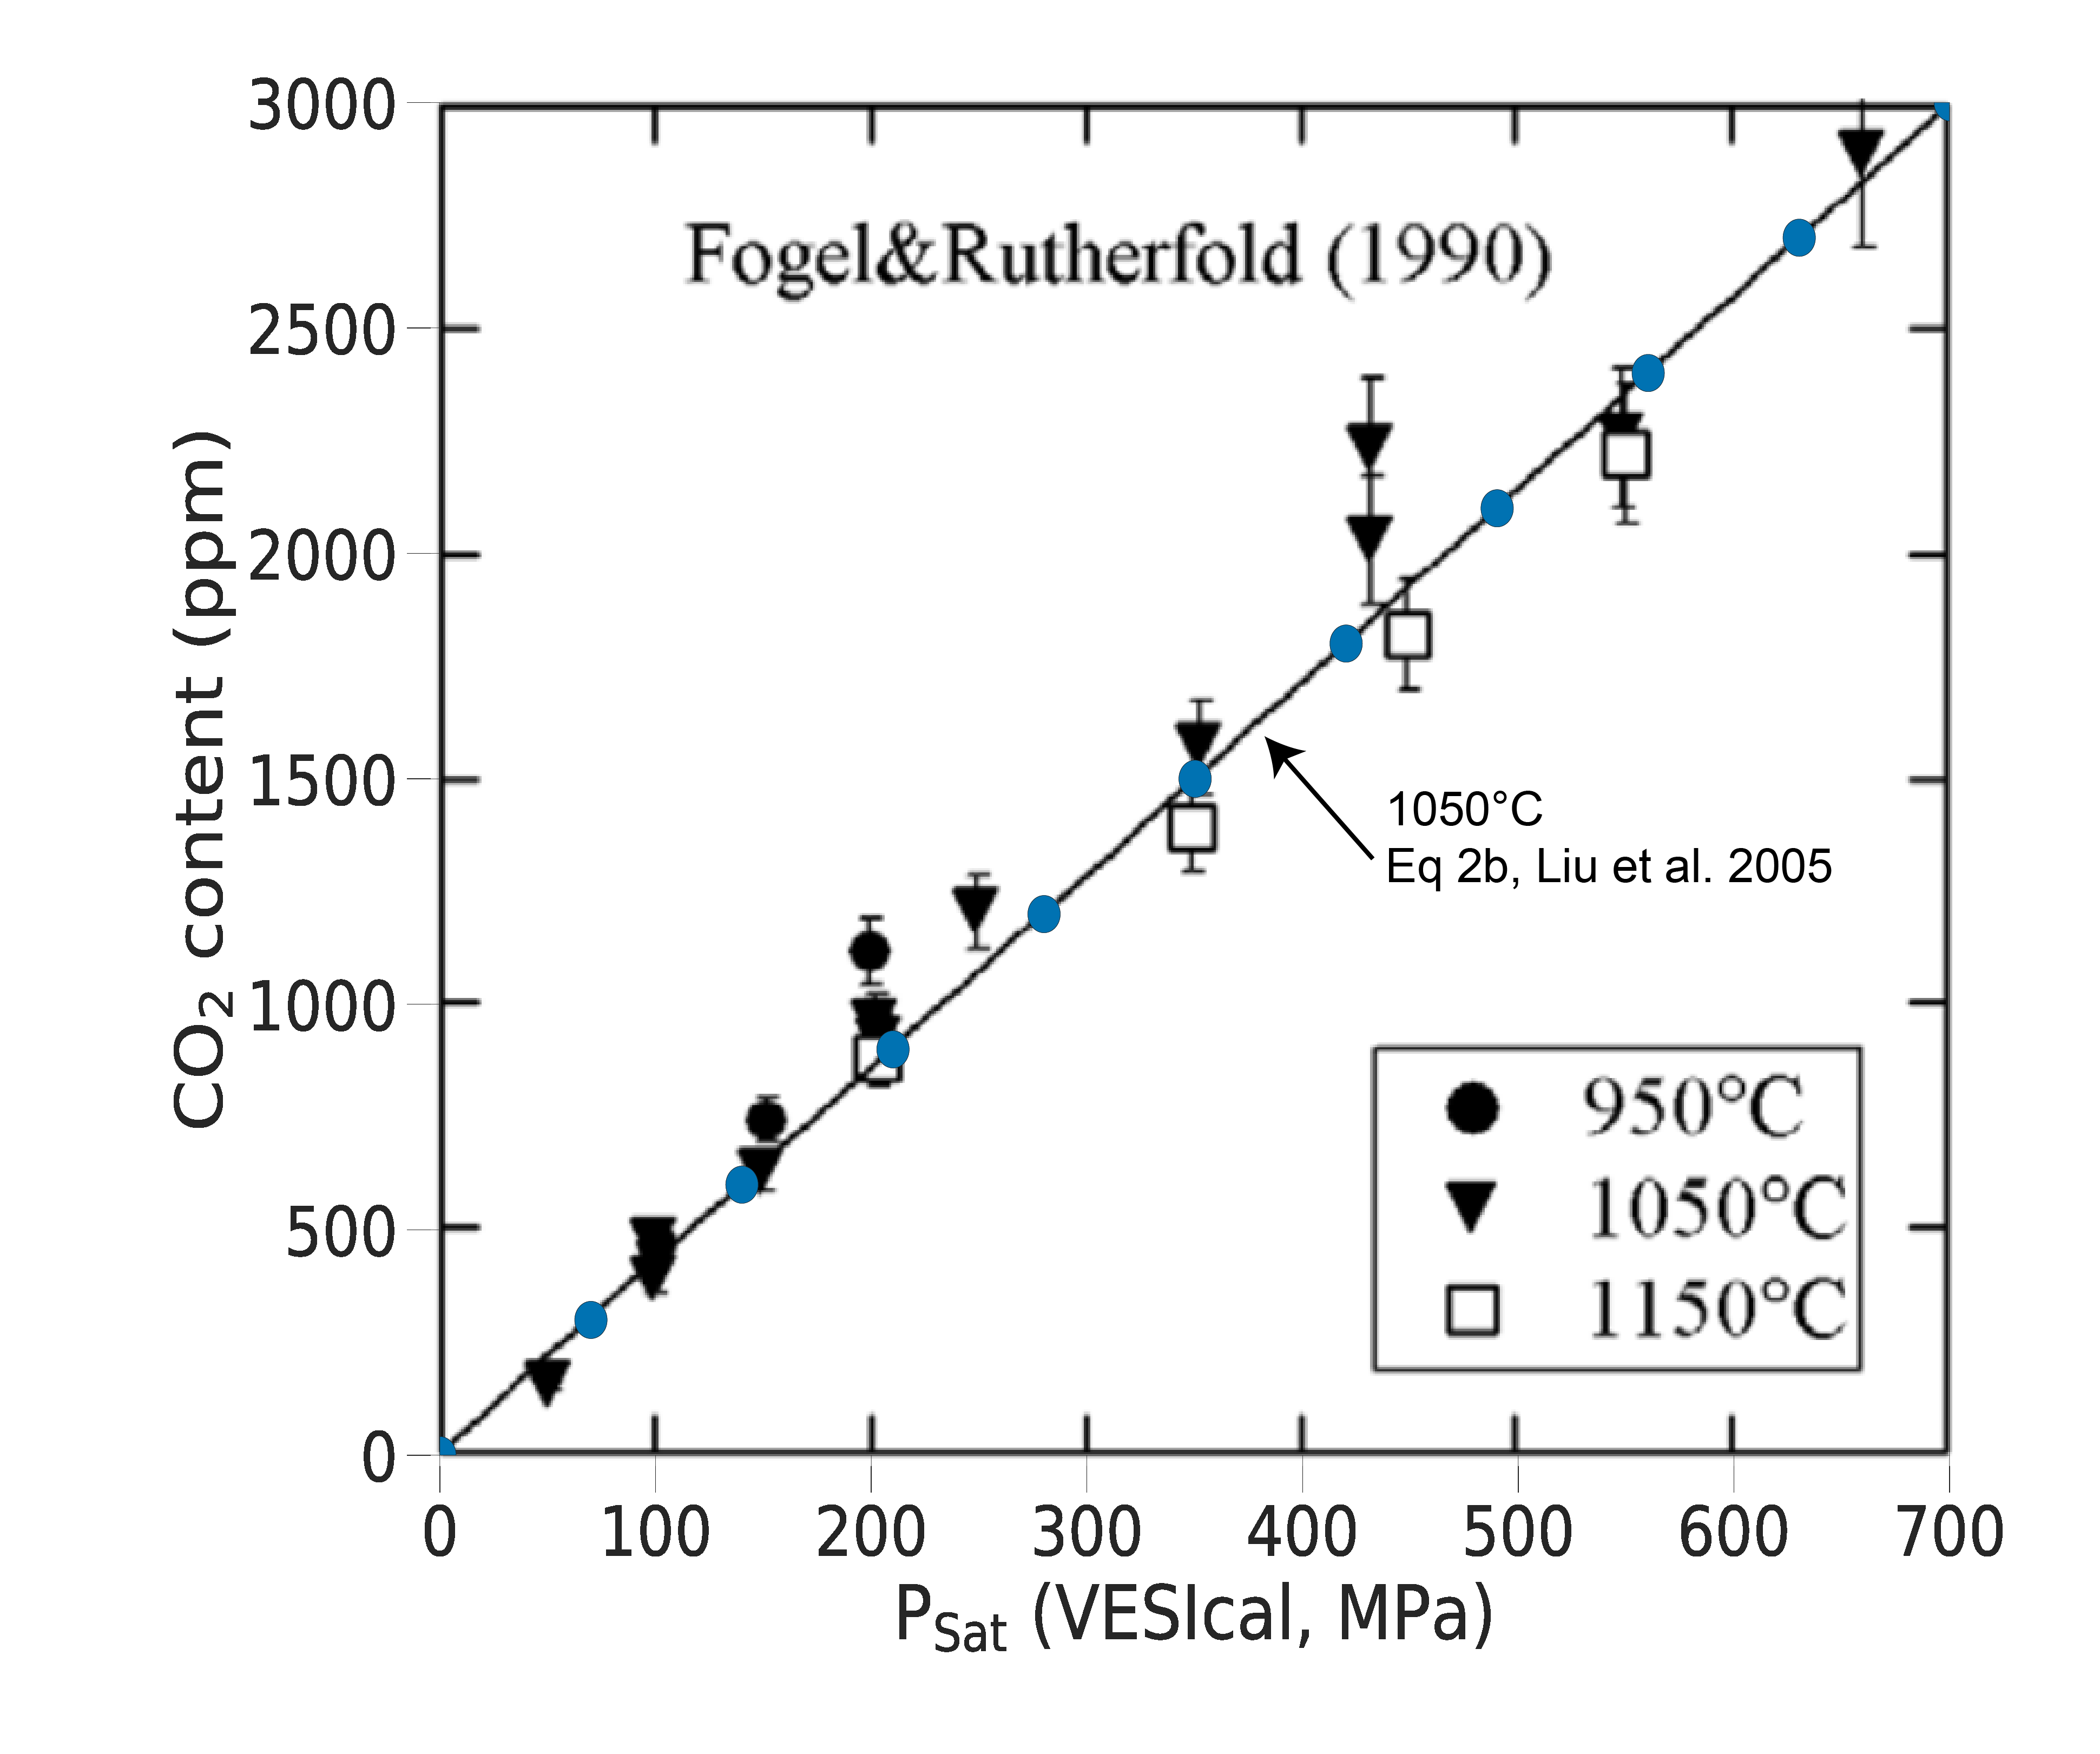


# Test 4  - Recreating isobars on their Fig.  6 plots

In [ ]:
# Extracting sample for isobar
"""To get composition from a specific sample in the input data:"""
SampleName = 'Sample1'
bulk_comp = myfile.get_sample_composition(SampleName, normalization='standard', asSampleClass = True)



In [ ]:
# 0.75 kbar 850C isobar
isobar_75_850, isopleth_75_850 = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Liu',
                                            temperature=850,
                                            pressure_list=[750],
                                            isopleth_list=[0.01, 0.1, 0.2, 0.25, 0.3,  0.5, 0.6,  0.75, 1],
                                            print_status=True).result

In [ ]:
# 2 kbar 1100C isobar
isobar_2_1100, isopleth_2_1100 = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Liu',
                                            temperature=1100,
                                            pressure_list=[2000],
                                            isopleth_list=[0.01, 0.1, 0.2, 0.25, 0.3,  0.5, 0.6,  0.75, 1],
                                            print_status=True).result

In [ ]:
# 5 kbar, 1100 C isobar
isobar_5_1100, isopleth_5_1100 = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Liu',
                                            temperature=1100,
                                            pressure_list=[5000],
                                            isopleth_list=[0.01, 0.1, 0.2, 0.25, 0.3,  0.5, 0.6,  0.75, 1],
                                            print_status=True).result

In [ ]:
isobar_75_850['CO2_liq']

In [ ]:
# Multiply volatiles by 0.98 as suggestedin the figure caption
fig, ax1 = plt.subplots(figsize = (10,8))
plt.plot(isobar_75_850['H2O_liq']*0.98, 10000*isobar_75_850['CO2_liq']*0.98, '--b')
plt.plot(isobar_2_1100['H2O_liq']*0.98, 10000*isobar_2_1100['CO2_liq']*0.98, '--r')
plt.plot(isobar_5_1100['H2O_liq']*0.98, 10000*isobar_5_1100['CO2_liq']*0.98, '--g')
plt.xlim([0, 12])
plt.ylim([0, 3000])

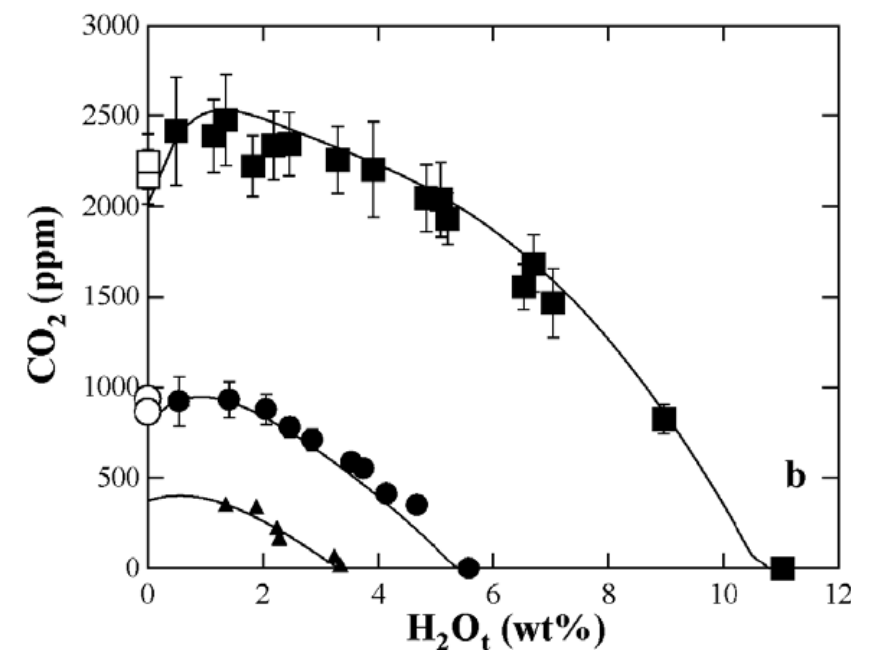
